# Problem Solutions 

unit is expressed in mm



## Problem 1 


Find, by the use of Figure 1, the direct kinematic transformations, $T^0_4$ for the robot stylus, and $T^0_5$ for the robot camera, as function of all joint angles.

In [52]:
from visual_kinematics.RobotSerial import *
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

from RobotController import *
import importlib

import RobotFunctions as RF
importlib.reload(RF) # **********

<module 'RobotFunctions' from 'c:\\Users\\Ku\\Documents\\university-of-waterloo\\3B_exchange\\DTU_robotics\\Robot_Control\\34753_Robotics_Group19\\RobotFunctions.py'>

In [ ]:
# Symbols
theta1, theta2, theta3, theta4 = sp.symbols('theta1 theta2 theta3 theta4', real=True)
d1, d2, d3, d4 = sp.symbols('d1 d2 d3 d4', real=True)

# DH transforms
T01 = RF.make_DH_matrix(theta1,  d1,   0,        sp.pi/2)
T12 = RF.make_DH_matrix(theta2,   0,  d2,       0)
T23 = RF.make_DH_matrix(theta3,   0,  d3,       0)
T34 = RF.make_DH_matrix(theta4,   0,  d4,       0)

# Manual T45 (pure translation)
T45 = sp.Matrix([
    [1, 0, 0, -0.015],
    [0, 1, 0,  0.045],
    [0, 0, 1,  0.0  ],
    [0, 0, 0,  1    ],
])

In [ ]:
T01_sym = sp.simplify(T01)
RF.print_matrix_aligned("T01 (symbolic)", T01_sym)

T12_sym = sp.simplify(T12)
RF.print_matrix_aligned("T12 (symbolic)", T12_sym)

T23_sym = sp.simplify(T23)
RF.print_matrix_aligned("T23 (symbolic)", T23_sym)

T34_sym = sp.simplify(T34)
RF.print_matrix_aligned("T34 (symbolic)", T34_sym)


T01 (symbolic) =
┌             │      │              │      ┐
│ cos(theta1) │    0 │  sin(theta1) │    0 │
│ sin(theta1) │    0 │ -cos(theta1) │    0 │
│           0 │ 1.00 │            0 │   d1 │
│           0 │    0 │            0 │ 1.00 │
└             │      │              │      ┘

T12 (symbolic) =
┌             │              │      │                ┐
│ cos(theta2) │ -sin(theta2) │    0 │ d2*cos(theta2) │
│ sin(theta2) │  cos(theta2) │    0 │ d2*sin(theta2) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T23 (symbolic) =
┌             │              │      │                ┐
│ cos(theta3) │ -sin(theta3) │    0 │ d3*cos(theta3) │
│ sin(theta3) │  cos(theta3) │    0 │ d3*sin(theta3) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T34 (symbolic) 

In [ ]:
# Symbolic total transform
T04_sym = sp.simplify(T01 * T12 * T23 * T34)
T05_sym = sp.simplify(T01 * T12 * T23 * T34 * T45)

print("=== SYMBOLIC MATRICES ===")

RF.print_matrix_aligned("T04 (symbolic)", T04_sym)
RF.print_matrix_aligned("T05 (symbolic)", T05_sym)

=== SYMBOLIC MATRICES ===

T04 (symbolic) =
┌                                           │                                            │              │                                                                                           ┐
│ cos(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta2 + theta3 + theta4)*cos(theta1) │  sin(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*cos(theta1) │
│ sin(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta1)*sin(theta2 + theta3 + theta4) │ -cos(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*sin(theta1) │
│             sin(theta2 + theta3 + theta4) │              cos(theta2 + theta3 + theta4) │            0 │          d1 + d2*sin(theta2) + d3*sin(theta2 + theta3) + d4*sin(theta2 + theta3 + theta4) │
│                                         0 │                                          0 │            0 │                                                           

Verify by testing an example joint configuration with known end-effector position

In [82]:
# Vivek's Problem 3 values: 0-deg value
q = np.array([np.deg2rad(0), np.deg2rad(51.5), np.deg2rad(-59.41), np.deg2rad(-82.09)], dtype=float)
pos = RF.fk_T04(q, 50, 93, 93, 55)
print(f'Final T04: \n{pos}')

Final T04: 
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.50009009e+02]
 [-6.12323400e-17  1.54074396e-33 -1.00000000e+00  3.05190462e-16]
 [-1.00000000e+00  0.00000000e+00  6.12323400e-17  5.49841385e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
# Vivek's Problem 3 90-deg value
q = np.array([np.deg2rad(0), np.deg2rad(116.2437), np.deg2rad(-104.715), np.deg2rad(-11.528)], dtype=float)
pos = RF.fk_T04(q, 50, 93, 93, 50)
print(f'Final T04: \n{pos}')

Final T04: 
[[ 1.00000000e+00 -1.22173048e-05  0.00000000e+00  1.00000022e+02]
 [ 7.48094159e-22  6.12323400e-17 -1.00000000e+00  6.24576989e-15]
 [ 1.22173048e-05  1.00000000e+00  6.12323400e-17  1.52001163e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## Problem 2 
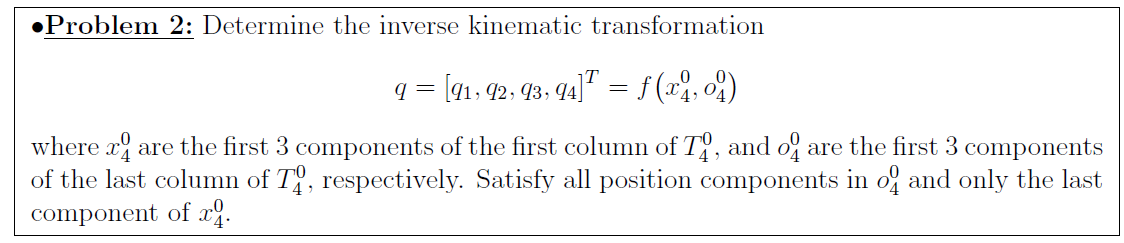

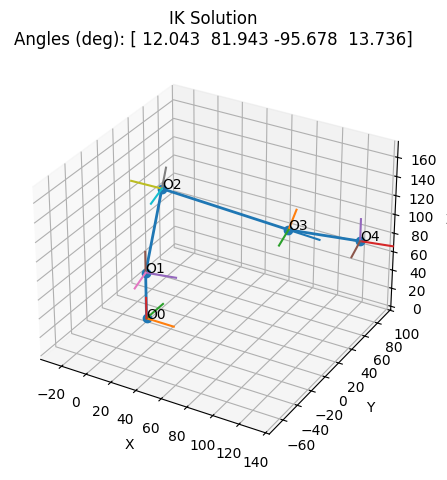

IK solution (rad): [ 0.21018259  1.4301724  -1.66990262  0.23973022]
IK solution (deg): [ 12.04257514  81.94284271 -95.67837236  13.73552965]
FK end-effector position (mm): [150.  32. 120.]
Target position (mm):          [150.  32. 120.]
Position error norm (mm):      7.105427357601002e-15


In [ ]:
from RobotFunctions import solve_fk_ik_and_visualize

# [1] Robot geometry (mm)
d1 = 50.0
d2 = 93.0
d3 = 93.0
d4 = 50.0

# [2] Inputs (robot position, and orientation of x-axis of end effector)
pos4 = np.array([150.0, 32.0, 120.0], dtype=float)  # End-effector position (o4^0)
Rot4_X4_Z0 = 0.0                                  # z-component of x4-axis (r31 of R04)

# [3] Solve IK, verify with FK, and visualise
q, T04_fk, T04_target = solve_fk_ik_and_visualize(pos4, Rot4_X4_Z0, d1, d2, d3, d4, draw_axes=True)

# [4] Print results
print("IK solution (rad):", q)
print("IK solution (deg):", np.rad2deg(q))

p_fk = T04_fk[0:3, 3]
print("FK end-effector position (mm):", p_fk)
print("Target position (mm):         ", pos4)
print("Position error norm (mm):     ", np.linalg.norm(p_fk - pos4))

## Problem 3 
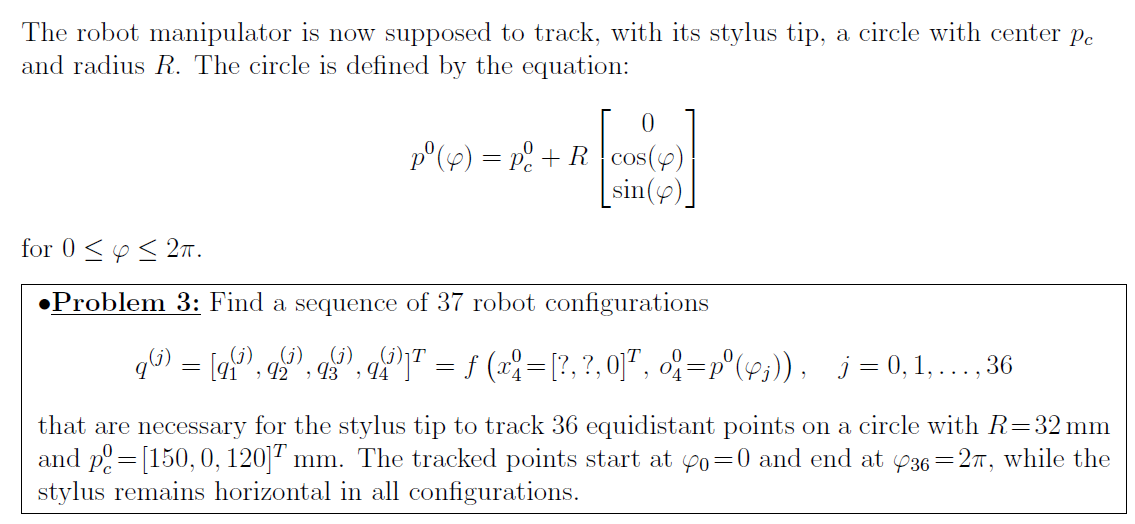

In [ ]:
# ---------- Circle specification ----------
phi = np.linspace(0.0, 2*np.pi, 37)                   # 37 points (φ₀ ... φ₃₆)
p_c0 = np.array([150.0, 0.0, 120.0], dtype=float)     # circle centre in {0}
R = 32.0                                              # circle radius (mm)
Rot4_X4_Z0 = 0.0                                      # stylus horizontal (r31 = 0)

# ---------- Storage ----------
Q_rad, Q_deg, P_fk, P_trg, errs = [], [], [], [], []

# ---------- Compute for each waypoint ----------
for th in phi:
    # Circle point: p⁰(φ) = p_c⁰ + R·[0, cosφ, sinφ]^T
    p_target = p_c0 + R * np.array([0.0, np.cos(th), np.sin(th)], dtype=float)

    # Build full pose and solve IK
    T_target = RF.build_pose_from_inputs(p_target, Rot4_X4_Z0)
    q = RF.inverse_ik_from_pose(T_target, d1, d2, d3, d4)

    # Forward check
    T_fk = RF.fk_T04(q, d1, d2, d3, d4)
    p_fk = T_fk[:3, 3]
    err = np.linalg.norm(p_fk - p_target)

    # Store
    Q_rad.append(q)
    Q_deg.append(np.rad2deg(q))
    P_fk.append(p_fk)
    P_trg.append(p_target)
    errs.append(err)

Q_rad, Q_deg, P_fk, P_trg, errs = (
    np.vstack(Q_rad),
    np.vstack(Q_deg),
    np.vstack(P_fk),
    np.vstack(P_trg),
    np.array(errs),
)

# ---------- Print verification for first waypoint ----------
print("IK solution (rad):", Q_rad[0])
print("IK solution (deg):", Q_deg[0])
print("FK end-effector position (mm):", P_fk[0])
print("Target position (mm):         ", P_trg[0])
print("Position error norm (mm):     ", errs[0])

print("\nGlobal checks over 37 points:")
print(f"Max |position error| (mm): {errs.max():.3e}")
print(f"Mean |position error| (mm): {errs.mean():.3e}")

IK solution (rad): [ 0.21018259  1.4301724  -1.66990262  0.23973022]
IK solution (deg): [ 12.04257514  81.94284271 -95.67837236  13.73552965]
FK end-effector position (mm): [150.  32. 120.]
Target position (mm):          [150.  32. 120.]
Position error norm (mm):      7.105427357601002e-15

Global checks over 37 points:
Max |position error| (mm): 5.955e-14
Mean |position error| (mm): 2.327e-14


In [ ]:
# ---------- Print all joint configurations ----------
print("\nAll 37 joint configurations (degrees):\n")

for j in range(len(phi)):
    print(f"phi_{j:<2d} = {np.round(Q_deg[j], 8)}")


All 37 joint configurations (degrees):

phi_0  = [ 12.04257514  81.94284271 -95.67837236  13.73552965]
phi_1  = [ 11.86484519  82.71977199 -93.06041825  10.34064627]
phi_2  = [ 11.33569998  83.39915099 -90.46433962   7.06518863]
phi_3  = [ 10.46748318  83.97285639 -87.9719723    3.99911591]
phi_4  = [  9.28139181  84.43962928 -85.66770094   1.22807167]
phi_5  = [  7.80815824  84.80356906 -83.63561029  -1.16795878]
phi_6  = [  6.08852815  85.07235112 -81.95555974  -3.11679138]
phi_7  = [  4.17315111  85.25520566 -80.69823913  -4.55696653]
phi_8  = [  2.12154884  85.3607923  -79.91966045  -5.44113184]
phi_9  = [  0.          85.39524898 -79.65596513  -5.73928384]
phi_10 = [ -2.12154884  85.3607923  -79.91966045  -5.44113184]
phi_11 = [ -4.17315111  85.25520566 -80.69823913  -4.55696653]
phi_12 = [ -6.08852815  85.07235112 -81.95555974  -3.11679138]
phi_13 = [ -7.80815824  84.80356906 -83.63561029  -1.16795878]
phi_14 = [ -9.28139181  84.43962928 -85.66770094   1.22807167]
phi_15 = [-10.

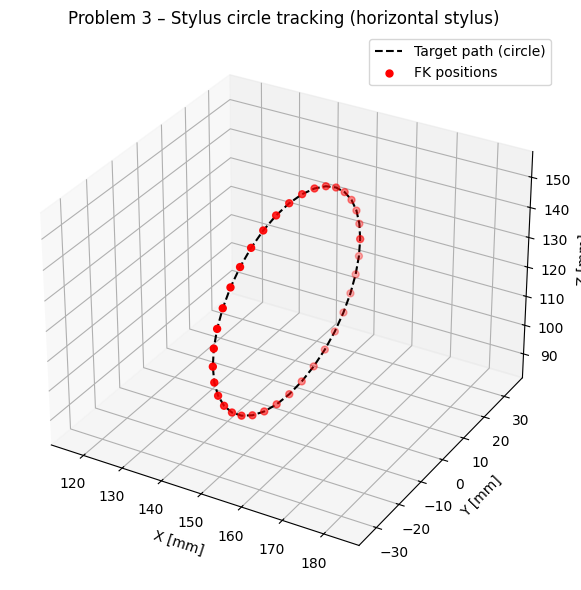


Visualizing waypoint j=0 (φ=0.00π)


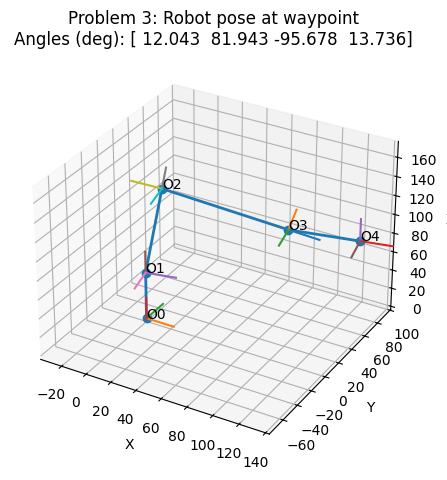

In [ ]:
# ---------- Plot all 37 positions ----------
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

# Plot circle path
ax.plot(P_trg[:,0], P_trg[:,1], P_trg[:,2], 'k--', label="Target path (circle)")
# Plot FK-computed points
ax.scatter(P_fk[:,0], P_fk[:,1], P_fk[:,2], c='r', s=25, label="FK positions")

# Equal aspect
x, y, z = P_trg[:,0], P_trg[:,1], P_trg[:,2]
max_range = max(x.max()-x.min(), y.max()-y.min(), z.max()-z.min())
mid = [x.mean(), y.mean(), z.mean()]
for axis, m in zip([ax.set_xlim, ax.set_ylim, ax.set_zlim], mid):
    axis(m - 0.6*max_range, m + 0.6*max_range)

ax.set_xlabel("X [mm]")
ax.set_ylabel("Y [mm]")
ax.set_zlabel("Z [mm]")
ax.set_title("Problem 3 – Stylus circle tracking (horizontal stylus)")
ax.legend()
plt.tight_layout()
plt.show()

# visualize any single configuration
j = 0   # choose any index 0–36
from math import pi
DH_table = np.array([
    [0.0,  d1, 0.0,  np.pi/2],
    [0.0, 0.0,  d2,  0.0],
    [0.0, 0.0,  d3,  0.0],
    [0.0, 0.0,  d4,  0.0],
])
print(f"\nVisualizing waypoint j={j} (φ={phi[j]/pi:.2f}π)")
RF.plot_robot_4link(Q_rad[j], DH_table, title="Problem 3: Robot pose at waypoint")


# Problem 4

Determine the Jacobian of the manipulator for the robot end-effector and the Jacobian for the robot camera (as a function of the joint configuration q). Report the numerical results for the two Jacobians at $\varphi = 0$, $\varphi = \pi/2$, $\varphi = \pi$, and $\varphi = 3\pi/2$ along the path studies in Problem 3.

In [ ]:
picks      = [0, 9, 18, 27, 36]          # indices along the 37-point path
phi_labels = [0, sp.pi/2, sp.pi, 3*sp.pi/2, 2*sp.pi]

for phi_lbl, idx in zip(phi_labels, picks):
    q_here = tuple(Q_rad[idx, :].tolist())
    J4, J5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)

    print(f"φ = {phi_lbl}   (row {idx})")
    print("J_end-effector (6×4):")
    sp.pretty_print(J4)
    print("\nJ_camera (6×4):")
    sp.pretty_print(J5)
    print("\n" + "-"*60 + "\n")

φ = 0   (row 0)
J_end-effector (6×4):
⎡-32.0  -68.4595    21.596        0    ⎤
⎢                                      ⎥
⎢150.0  -14.6047    4.60715       0    ⎥
⎢                                      ⎥
⎢  0     153.375    140.34      50.0   ⎥
⎢                                      ⎥
⎢  0    0.208638   0.208638   0.208638 ⎥
⎢                                      ⎥
⎢  0    -0.977993  -0.977993  -0.977993⎥
⎢                                      ⎥
⎣ 1.0       0          0          0    ⎦

J_camera (6×4):
⎡-31.9969  -68.5035    21.552    -0.0440097 ⎤
⎢                                           ⎥
⎢149.985   -14.6141    4.59776   -0.00938873⎥
⎢                                           ⎥
⎢   0       153.36     140.325     49.985   ⎥
⎢                                           ⎥
⎢   0      0.208638   0.208638    0.208638  ⎥
⎢                                           ⎥
⎢   0      -0.977993  -0.977993   -0.977993 ⎥
⎢                                           ⎥
⎣  1.0         0          0       

# Problem 5

Compute the joint velocities $\dot{p}$ at $\varphi = \pi/2$, along the path from Problem 3, so that the stylus tip velocity is $v^0_4 = [0, -3, 0]mm/s$ and $\dot{x_4} = [?,?,0]$.

In [ ]:
idx = 9                      # φ = π/2 along your 37-point path
q_here = tuple(Q_rad[idx, :].tolist())

J4, _ = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)

# Desired end-effector twist v = [vx, vy, vz, wx, wy, wz]^T  (mm/s, rad/s)
v = sp.Matrix([0, -3, 0, 0, 0, 0])

# Minimum-norm solution: dq = J^+ v (right pseudoinverse for 6x4 J)
J4_pinv = J4.pinv()
joint_velocities = J4_pinv * v
# dq = (J4.T*J4).inv() * J4.T * v

# print the pseudoinverse
print("Pseudoinverse")
sp.pretty_print(J4_pinv.applyfunc(lambda x: 0 if abs(sp.N(x)) < 1e-8 else sp.N(x, 6)))
# print the joint velocities
print("\nJoint Velocities")
sp.pretty_print(joint_velocities.applyfunc(lambda x: 0 if abs(sp.N(x)) < 1e-8 else sp.N(x, 6)))

Pseudoinverse
⎡     0        0.00666637       0       0      0       4.44425e-5⎤
⎢                                                                ⎥
⎢ -0.0108753       0       -0.00109386  0  -0.0546657      0     ⎥
⎢                                                                ⎥
⎢ 0.0117507        0        0.0119934   0   0.599548       0     ⎥
⎢                                                                ⎥
⎣-0.000871658      0        -0.01091    0   -1.54512       0     ⎦

Joint Velocities
⎡-0.0199991⎤
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎣    0     ⎦


# Problem 6

In this part, the goal is to plan a trajectory which approximates the circular path from
Problem 3 by means of 5 knot-points at $φ_0, φ_9, φ_{18}, φ_{27}, φ_{36}$.

Use the inverse computed joint configurations $q^{(0)}, q^{(9)}, q^{(18)}, q^{(27)}, q^{(36)}$ from Problem 3, to find suitable interpolation polynomials for the segments.



In [ ]:
from tabulate import tabulate

picks = [0, 9, 18, 27, 36]                 # indices along the 37-point path
phi_labels = [0, sp.pi/2, sp.pi, 3*sp.pi/2, 2*sp.pi]

# Store the selected joint configurations
q_selected = [tuple(Q_rad[idx, :].tolist()) for idx in picks]

# Combine with phi values for table display
table_data = []
for phi_lbl, q_vals in zip(phi_labels, q_selected):
    table_data.append([f"{float(phi_lbl):.3f} rad"] + [f"{q:.5f}" for q in q_vals])

# Print as a pretty table
headers = ["φ (rad)", "θ1", "θ2", "θ3", "θ4"]
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════╤══════════╤═════════╤══════════╤══════════╕
│ φ (rad)   │       θ1 │      θ2 │       θ3 │       θ4 │
╞═══════════╪══════════╪═════════╪══════════╪══════════╡
│ 0.000 rad │  0.21018 │ 1.43017 │ -1.6699  │  0.23973 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 1.571 rad │  0       │ 1.49043 │ -1.39026 │ -0.10017 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 3.142 rad │ -0.21018 │ 1.43017 │ -1.6699  │  0.23973 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 4.712 rad │ -0       │ 1.32116 │ -1.91603 │  0.59487 │
├───────────┼──────────┼─────────┼──────────┼──────────┤
│ 6.283 rad │  0.21018 │ 1.43017 │ -1.6699  │  0.23973 │
╘═══════════╧══════════╧═════════╧══════════╧══════════╛


In [ ]:
# End-effector linear velocities (mm/s) at each knot
v_lin_knots = [
    (0.0,   0.0,   0.0),
    (0.0, -27.0,  0.0),
    (0.0,   0.0, -27.0),
    (0.0,  27.0,  0.0),
    (0.0,   0.0,   0.0),
]

# Determine the joint angles at these knots
q_knots = RF.get_q_knots(Q_rad, picks)

# Determine joint velocities at these knots - from EE velocities
qdot_knots = RF.compute_qdot_knots(q_knots, v_lin_knots, d1, d2, d3, d4, T45, lam=None)
RF.print_joint_table(phi_labels, q_knots, qdot_knots)

╒═══════════╤═══════════╤═════════╤══════════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╕
│   φ (rad) │        θ1 │      θ2 │       θ3 │        θ4 │     θ1dot │     θ2dot │     θ3dot │    θ4dot │
╞═══════════╪═══════════╪═════════╪══════════╪═══════════╪═══════════╪═══════════╪═══════════╪══════════╡
│     0     │  0.210183 │ 1.43017 │ -1.6699  │  0.23973  │  0        │  0        │  0        │ 0        │
├───────────┼───────────┼─────────┼──────────┼───────────┼───────────┼───────────┼───────────┼──────────┤
│     1.571 │  0        │ 1.49043 │ -1.39026 │ -0.100169 │ -0.179992 │  0        │  0        │ 0        │
├───────────┼───────────┼─────────┼──────────┼───────────┼───────────┼───────────┼───────────┼──────────┤
│     3.142 │ -0.210183 │ 1.43017 │ -1.6699  │  0.23973  │  0        │ -0.069265 │ -0.219486 │ 0.288391 │
├───────────┼───────────┼─────────┼──────────┼───────────┼───────────┼───────────┼───────────┼──────────┤
│     4.712 │ -0        │ 1.32116 │ -1.91603 │

In [ ]:
# Construct joint-space quintic trajectories between the knots
# Each 2-sec segment satisfies the boundary conditions for joint pos, vel, and accel
coeffs = RF.build_segment_coeffs(q_knots, qdot_knots, Tseg=2.0)

# Compute the world path from the interpolated join trajectory
# xyz_actual is the path generated by the interpolated joint trajectory (via FK)
# xyz_desired is the original "ideal circle" from the 37 sampled configurations
ts, xyz_actual, xyz_desired = RF.sample_paths(coeffs, Q_rad, d1, d2, d3, d4, N=400, T_total=8.0)
rmse_mm = RF.compute_rmse(xyz_actual, xyz_desired)

# Compute trajectory accuracy via RMSE
print(f"\nPath RMSE (mm): {rmse_mm:.3f}")


Path RMSE (mm): 4.538


In [ ]:
# Build segment matrices (rows = joints 1–4, cols = t^5..t^0)
A = RF.segment_matrix(coeffs['A'])
B = RF.segment_matrix(coeffs['B'])
C = RF.segment_matrix(coeffs['C'])
D = RF.segment_matrix(coeffs['D'])

# Print the matrices of interpolation coefficients
RF.print_matrix_aligned("A_ij coefficients", A)
RF.print_matrix_aligned("B_ij coefficients", B)
RF.print_matrix_aligned("C_ij coefficients", C)
RF.print_matrix_aligned("D_ij coefficients", D)


A_ij coefficients =
┌          │         │         │   │           │       ┐
│ -0.00566 │  0.0396 │ -0.0827 │ 0 │         0 │ 0.210 │
│   0.0113 │ -0.0565 │  0.0753 │ 0 │  1.11e-16 │  1.43 │
│   0.0524 │  -0.262 │   0.350 │ 0 │  6.66e-16 │ -1.67 │
│  -0.0637 │   0.319 │  -0.425 │ 0 │ -8.88e-16 │ 0.240 │
└          │         │         │   │           │       ┘

B_ij coefficients =
┌          │          │          │   │           │          ┐
│ -0.00566 │   0.0171 │  0.00726 │ 0 │    -0.180 │ 1.31e-17 │
│  0.00169 │ -0.00412 │ -0.00605 │ 0 │ -1.04e-17 │     1.49 │
│  -0.0113 │   0.0701 │   -0.130 │ 0 │ -1.11e-16 │    -1.39 │
│  0.00966 │  -0.0663 │    0.136 │ 0 │  1.11e-16 │   -0.100 │
└          │          │          │   │           │          ┘

C_ij coefficients =
┌          │         │         │   │         │        ┐
│  0.00566 │ -0.0396 │  0.0827 │ 0 │       0 │ -0.210 │
│ -0.00745 │  0.0329 │ -0.0324 │ 0 │ -0.0693 │   1.43 │
│ -0.00500 │  0.0113 │  0.0216 │ 0 │  -0.219 │  -1.67 │

# Problem 7

Plot the actual path of the end-effector for the entire period from = 0 to 8 s for the interpolated trajectory from problem 6 and compare it to the exact desired circular path. Try to improve the approximation either by using more knot-points or by using different interpolation functions that those found in Problem 6.

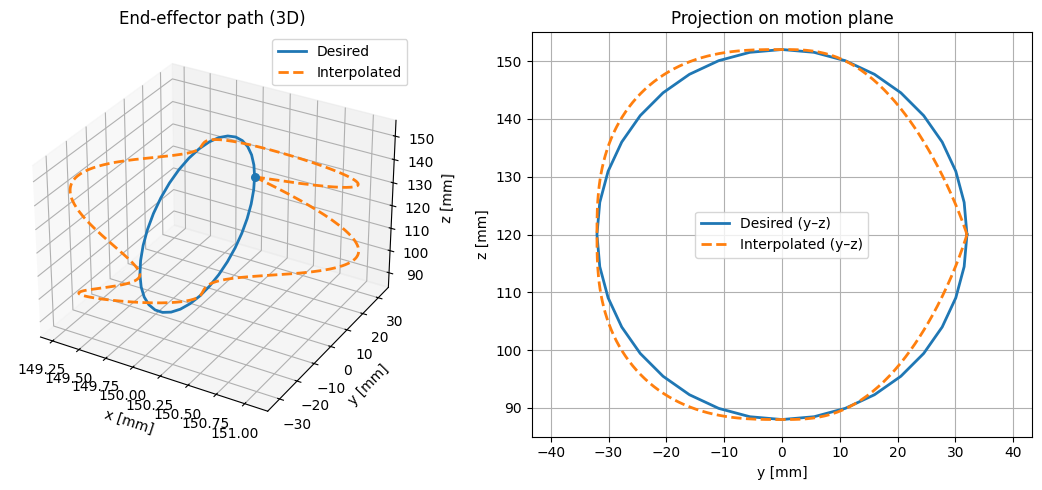

In [ ]:
RF.plot_paths(ts, xyz_actual, xyz_desired)


# Problem 8 
Plot the condition number of the Jacobian matrix of the manipulator along
the path from Problem 3 as well as along the actual path from Problem 6 or 7, and evaluate
if the path includes any singularities.


In [ ]:
kappa_values = []

for q_select in Q_rad:
    q_here = tuple(q_select.tolist())
    J4, J5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)

    # Convert symbolic matrix -> numeric numpy array
    J4_num = np.array(J4.evalf(3)).astype(np.float64)

    # Compute condition number
    kappa = np.linalg.cond(J4_num)
    kappa_values.append(kappa)

    #print(f"Condition number κ(J) = {kappa:.3e}")

Q_interp = RF.interpolate_joint_trajectory(coeffs, N=400, T_total=8.0)

kappa_interp = []

for q_select in Q_interp:
    q_here = tuple(q_select.tolist())
    J4, J5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)
    J4_num = np.array(J4.evalf(3)).astype(np.float64)
    kappa = np.linalg.cond(J4_num)
    kappa_interp.append(kappa)


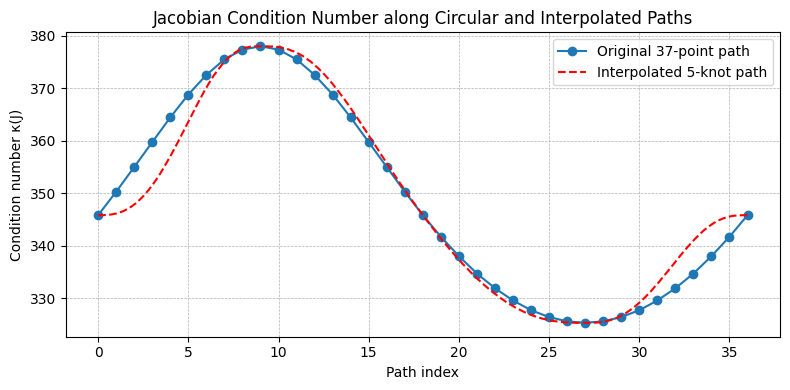

In [ ]:

singular_threshold = 1e8
# Plot all kappa values
plt.figure(figsize=(8,4))
# what should we pick for singular threashold?
#plt.axhline(singular_threshold, color='r', linestyle='--', label='Singularity threshold')
plt.plot(range(len(Q_rad)), kappa_values, 'o-', label='Original 37-point path')
plt.plot(np.linspace(0, len(Q_rad)-1, len(kappa_interp)), kappa_interp, 'r--', label='Interpolated 5-knot path')
#plt.yscale('log')
plt.xlabel('Path index')
plt.ylabel('Condition number κ(J)')
plt.title('Jacobian Condition Number along Circular and Interpolated Paths')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Problem 9 
Neglecting the own mass of the robot arm, and assuming a weight of 1N
acting on the end-effector along the negative z0 direction, calculate and plot all joint torques
τ1, τ2, τ3, τ4 as a function of the position φ ∈ [0, 2π]. Hint: Neglect friction and other losses.

In [ ]:
t14 = []
t24 = []
t34 = []
t44 = []
t_total = []
F = sp.Matrix([0, 0, -1, 0, 0, 0])  # Define force applied on the segments

# Calculate torques, Joint torques/forces vector 𝜏 can be found as tao = J^t * F
# where F is a 6-component vector with forces/torques applied to the end-effector

for q_select in Q_rad:
    J_4, J_5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)
    t_total = (J_4.T* F)
    t14.append(t_total[0, :])
    t24.append(t_total[1, :])
    t34.append(t_total[2, :])
    t44.append(t_total[3, :])

t3 = sp.Matrix([t14, t24, t34, t44]).T


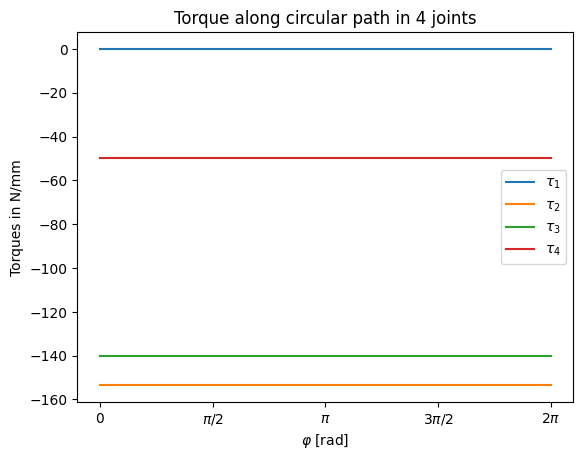

In [61]:
plt.figure()
plt.title('Torque along circular path in 4 joints')
plt.plot(phi, t3[:,0], label=r'$\tau_1$')
plt.plot(phi, t3[:,1], label=r'$\tau_2$')
plt.plot(phi, t3[:,2], label=r'$\tau_3$')
plt.plot(phi, t3[:,3], label=r'$\tau_4$')
xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
xtick_labels = ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
plt.xticks(xticks, xtick_labels)
plt.ylabel('Torques in N/mm')
plt.xlabel(r'$\varphi$ [rad]')  # X-axis label in radians
plt.legend()
plt.show()